In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
def Newton_Method(F, DF, x, iter_num=10**4):
    for _ in range(iter_num):
        s = np.linalg.inv(DF(x)).dot(F(x))        
        x -= s
    
    return x

def Gauss_Newton(r, Dr, x, iter_num=10**4):
    for _ in range(iter_num):
        A = Dr(x)
        v = -np.linalg.inv(A.T.dot(A)).dot(A.T).dot(r(x))
        x += v
    
    return x

def Levenberg_Marquardt(r, Dr, x, lamb=1, iter_num=10**4):
    for _ in range(iter_num):
        A = Dr(x)
        ATA = A.T.dot(A)
        v = -np.linalg.inv(ATA + lamb*np.diag(np.diag(ATA))).dot(A.T).dot(r(x))
        x += v
    
    return x

# 例1

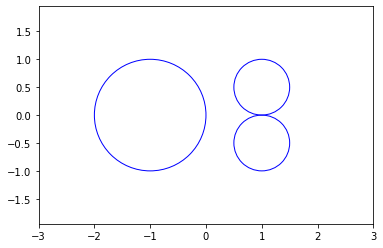

In [5]:
circle1 = plt.Circle((-1, 0), 1, color='b', fill=False)
circle2 = plt.Circle((1, 0.5), 0.5, color='b', fill=False)
circle3 = plt.Circle((1, -0.5), 0.5, color='b', fill=False)
plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)
plt.gcf().gca().add_artist(circle3)
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [6]:
def Gauss_Newton(r, Dr, x, iter_num=10**4):
    for i in range(iter_num):
        A = Dr(x)
        v = -np.linalg.inv(A.T.dot(A)).dot(A.T).dot(r(x))
        x += v
        print("At: ",i,"x= ",x,"Delta x: ",np.linalg.norm(v,2),"r: ",np.linalg.norm(r(x)))
        
    
    return x

In [7]:
def r(x):
    c1, c2, c3 = ((-1, 0), (1, 0.5), (1, -0.5))
    
    r1 = np.sqrt(np.sum((c1 - x)**2)) - 1
    r2 = np.sqrt(np.sum((c2 - x)**2)) - 0.5
    r3 = np.sqrt(np.sum((c3 - x)**2)) - 0.5
    
    return np.array([r1, r2, r3])
        
def Dr(x):    
    c1, c2, c3 = ((-1, 0), (1, 0.5), (1, -0.5))

    dr1 = (x - c1) / np.sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / np.sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / np.sqrt(np.sum((c3 - x)**2))
    
    return np.array([dr1, dr2, dr3])

In [13]:
initial_guess = np.zeros(2, dtype=float)
initial_guess = np.array([1,1],dtype=float)
print(r(initial_guess))
print(Dr(initial_guess))
(x, y) = Gauss_Newton(r, Dr, initial_guess,30)
print("(x, y): (%.6f, %.6f)" % (x, y))

[1.23606798 0.         1.        ]
[[0.89442719 0.4472136 ]
 [0.         1.        ]
 [0.         1.        ]]
At:  0 x=  [-0.13196601  0.5       ] Delta x:  1.237476080829635 r:  1.1917710532385788
At:  1 x=  [ 0.4427524  -0.42111589] Delta x:  1.0857051826085118 r:  0.7676770839645751
At:  2 x=  [0.37419437 0.33511437] Delta x:  0.7593315544496773 r:  0.6992224886858098
At:  3 x=  [ 0.40253263 -0.3157597 ] Delta x:  0.6514906860590852 r:  0.6844610041083108
At:  4 x=  [0.40535567 0.28435377] Delta x:  0.6001201133098192 r:  0.6635577003434106
At:  5 x=  [ 0.40989012 -0.25565698] Delta x:  0.5400297874468105 r:  0.6458303602293288
At:  6 x=  [0.41251782 0.22706416] Delta x:  0.4827282976869623 r:  0.6295314883172137
At:  7 x=  [ 0.41405551 -0.19921983] Delta x:  0.42628677191033476 r:  0.615088620546842
At:  8 x=  [0.4147317 0.1727029] Delta x:  0.3719233497163833 r:  0.6027602266055414
At:  9 x=  [ 0.41484352 -0.14814838] Delta x:  0.32085130128025124 r:  0.5926852745020248
At:  10 x

# 非线性参数

In [17]:
def r(c):
    xi = np.array([50,55,60,65,70,75,80], dtype=float)
    yi = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39],dtype=float)
    
    r=c[0]*np.exp(c[1]*xi)-yi
    
    return r
        
def Dr(c):
    xi = np.array([50,55,60,65,70,75,80], dtype=float)
    yi = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39],dtype=float)  
    
    dr1=np.exp(c[1]*xi)
    dr2=c[0]*xi*np.exp(c[1]*xi)
    
    return np.array([dr1, dr2]).T

In [ ]:
#转化为线性

In [23]:
def ls(A, b):
    return np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
2.493156498455768 0.061520339086728326


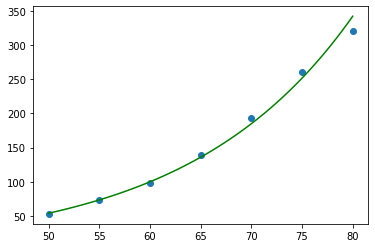

In [25]:
xi = np.array([50,55,60,65,70,75,80], dtype=float)
yi = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39],dtype=float)
num=np.log(yi)
A = np.zeros((2, 7), dtype=float)
print(A)

A[0]=xi**0
A[1]=xi
A=A.T
b=num
c=ls(A,b)
print(np.exp(c[0]),c[1])
plt.scatter(xi, yi)
t_range=np.linspace(50,80,100)
yi=np.exp(c[0]+c[1]*t_range)
plt.plot(t_range,yi,'g-')

In [19]:
cc = np.array([50,0.1], dtype=float)
print(cc)
print(r(cc))
print(Dr(cc))

c1,c2 = Gauss_Newton(r, Dr, cc,20)
print("(c1, c2): (%.6f, %.6f)" % (c1, c2))

[50.   0.1]
[  7367.60795513  12161.55661321  20073.12967464  33117.30165222
  54638.17792142  90141.9207228  148727.50935209]
[[1.48413159e+02 3.71032898e+05]
 [2.44691932e+02 6.72902814e+05]
 [4.03428793e+02 1.21028638e+06]
 [6.65141633e+02 2.16171031e+06]
 [1.09663316e+03 3.83821605e+06]
 [1.80804241e+03 6.78015905e+06]
 [2.98095799e+03 1.19238319e+07]]
At:  0 x=  [0.67350665 0.0998585 ] Delta x:  49.326493346365325 r:  2021.1363702003728
At:  1 x=  [0.67873225 0.08928004] Delta x:  0.011798765329536718 r:  638.340245407794
At:  2 x=  [1.17823715 0.07229397] Delta x:  0.4997936294971953 r:  66.04369034876676
At:  3 x=  [2.44432917 0.05707657] Delta x:  1.2661834645492052 r:  143.00318571908605
At:  4 x=  [3.25510311 0.05800795] Delta x:  0.8107744735792256 r:  22.3450968296224
At:  5 x=  [3.26760933 0.05770883] Delta x:  0.01250979979432509 r:  20.310522765376074
At:  6 x=  [3.26520263 0.05771652] Delta x:  0.002406718349988998 r:  20.3103399937203
At:  7 x=  [3.26528306 0.05771619]

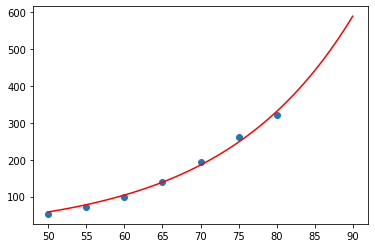

In [20]:
xi = np.array([50,55,60,65,70,75,80], dtype=float)
yi = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39],dtype=float)
x_range=np.linspace(50,90,100)
plt.scatter(xi,yi)
plt.plot(x_range,c1*np.exp(c2*x_range),'r-')

# Levenberg_Marquardt

In [26]:
def Levenberg_Marquardt(r, Dr, x, lamb=1, iter_num=10**4):
    for _ in range(iter_num):
        A = Dr(x)
        ATA = A.T.dot(A)
        v = -np.linalg.inv(ATA + lamb*np.diag(np.diag(ATA))).dot(A.T).dot(r(x))
        x += v
    
    return x

In [27]:
import numpy as np
def cond(A):  # inf-范数
    return abs(A).sum(axis=1).max() * abs(np.linalg.inv(A)).sum(axis=1).max()

In [28]:
import numpy as np
A=np.random.rand(3,3)
print(cond(A))
A[2]=10**(-7)*A[2]
print(cond(A))

207.8620602408034
650109195.2398716


In [29]:
print(cond(A.T.dot(A)))

3.4142194393438628e+16


In [10]:
lamb=0.01
B=A.T.dot(A)+lamb*np.diag(np.diag(A.T.dot(A)))
print(cond(B))

346.02707736167935


1.0
[0. 0. 0. 0. 0. 0.]


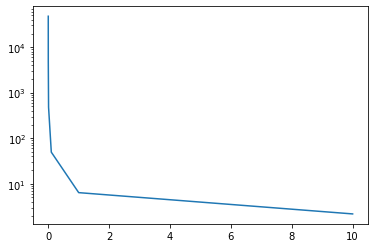

In [11]:
lam= np.array([10,1.0,0.1,0.01,0.001,0.0001],dtype=float)
print(lam[1])
kappa=np.zeros(6)
print(kappa)
for i in range(6):
    kappa[i]=cond(A.T.dot(A)+lam[i]*np.diag(np.diag(A.T.dot(A))))
plt.yscale("log")
plt.plot(lam,kappa)

In [19]:
import numpy as np
A=np.random.rand(3,3)
B=np.random.rand(3)
print(B)
print(np.diag(B))
print(A.T.dot(A))
print(np.diag(A.T.dot(A)))
print(np.diag(np.diag(A.T.dot(A))))

[0.54928042 0.8947698  0.37094232]
[[0.54928042 0.         0.        ]
 [0.         0.8947698  0.        ]
 [0.         0.         0.37094232]]
[[0.4462426  0.65093832 0.468768  ]
 [0.65093832 1.02798731 0.58992512]
 [0.468768   0.58992512 0.61625334]]
[0.4462426  1.02798731 0.61625334]
[[0.4462426  0.         0.        ]
 [0.         1.02798731 0.        ]
 [0.         0.         0.61625334]]


# 例2

In [100]:
def r(c):
    xi = np.array([1,2,2,3,4], dtype=float)
    yi = np.array([3,5,7,5,1],dtype=float)
    
    r=c[0]*np.exp(-c[1]*(xi-c[2])**2)-yi
    
    return r
        
def Dr(c):
    xi = np.array([1,2,2,3,4], dtype=float)
    yi = np.array([3,5,7,5,1],dtype=float)
    
    dr1=np.exp(-c[1]*(xi-c[2])**2)
    dr2=-c[0]*(xi-c[2])**2*np.exp(-c[1]*(xi-c[2])**2)
    dr3=2*c[0]*c[1]*(xi-c[2])*np.exp(-c[1]*(xi-c[2])**2)
    
    return np.array([dr1, dr2, dr3]).T

In [101]:
def Gauss_Newton(r, Dr, x, iter_num=10**4):
    for i in range(iter_num):
        A = Dr(x)
        print("A=",A)
        v = -np.linalg.inv(A.T.dot(A)).dot(A.T).dot(r(x))
        print("v=",v)
        x += v
        print("r(x): ",r(x))
        print("At: ",i,"x= ",x,"Delta x: ",np.linalg.norm(v,2),"r: ",np.linalg.norm(r(x)))
    return x

In [102]:
cc = np.array([1,1,1], dtype=float)
cc = np.array([0.1,-2,2], dtype=float)
print(cc)
print(r(cc))
print(Dr(cc))

c1,c2,c3 = Gauss_Newton(r, Dr, cc,5)
print("(c1, c2, c3): (%.6f, %.6f, %.6f)" % (c1, c2,c3))

[ 0.1 -2.   2. ]
[ -2.26109439  -4.9         -6.9         -4.26109439 297.0957987 ]
[[ 7.38905610e+00 -7.38905610e-01  2.95562244e+00]
 [ 1.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 7.38905610e+00 -7.38905610e-01 -2.95562244e+00]
 [ 2.98095799e+03 -1.19238319e+03 -2.38476639e+03]]
A= [[ 7.38905610e+00 -7.38905610e-01  2.95562244e+00]
 [ 1.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 7.38905610e+00 -7.38905610e-01 -2.95562244e+00]
 [ 2.98095799e+03 -1.19238319e+03 -2.38476639e+03]]
v= [ 0.91480454  3.51720684 -0.49051661]
r(x):  [-2.31554365 -4.29556124 -6.29556124 -4.96512521 -0.99991695]
At:  0 x=  [1.01480454 1.51720684 1.50948339] Delta x:  3.667181179678371 r:  9.439278692646225
A= [[ 6.74471117e-01 -1.77666612e-01 -1.05815813e+00]
 [ 6.94162017e-01 -1.69492576e-01  1.04850800e+00]
 [ 6.94162017e-01 -1.69492576e-01  1.04850800e+00]
 [ 3.43660188e-02 -7.74792241e-02  1.57

In [103]:
def Levenberg_Marquardt(r, Dr, x, lamb=1, iter_num=10**4):
    for i in range(iter_num):
        A = Dr(x)
        #print("x=",x)
        #print("r(x)=",r(x))
        #print("Dr(x)=",Dr(x))
        ATA = A.T.dot(A)
        v = -np.linalg.inv(ATA + lamb*np.diag(np.diag(ATA))).dot(A.T).dot(r(x))
        x += v
        if(i%100==0):
          print("At: ",i,"x= ",x,"Delta x: ",np.linalg.norm(v,2),"r: ",np.linalg.norm(r(x)))
    return x

In [112]:
cc = np.array([1,1,1], dtype=float)
#cc = np.array([-1,2,2], dtype=float)
#c1,c2,c3 =Levenberg_Marquardt(r,Dr,cc,1.0,1000)
c1,c2,c3 =Levenberg_Marquardt(r,Dr,cc,50.0,1000)
#c1,c2,c3 =Levenberg_Marquardt(r,Dr,cc,600000.0,1000)
print("(c1, c2, c3): (%.6f, %.6f, %.6f)" % (c1, c2,c3))

At:  0 x=  [1.09360726 0.68735403 1.15194929] Delta x:  0.35999778834810836 r:  9.35615366552835
At:  100 x=  [4.59086807 0.20179604 2.06635602] Delta x:  0.015433846503376935 r:  3.013430658372292
At:  200 x=  [5.58338093 0.35650035 2.16797427] Delta x:  0.006458230873570552 r:  1.8744210452792016
At:  300 x=  [6.00586522 0.44300269 2.21544249] Delta x:  0.0027391975051338367 r:  1.5623474281393488
At:  400 x=  [6.18103911 0.4814876  2.23481292] Delta x:  0.0011183514863641884 r:  1.5030681987602266
At:  500 x=  [6.25209966 0.49759459 2.2429669 ] Delta x:  0.00045335636614957775 r:  1.4930811057959152
At:  600 x=  [6.2808844  0.50421209 2.24639129] Delta x:  0.0001840355128838068 r:  1.4914272950866916
At:  700 x=  [6.29257202 0.50691512 2.24781304] Delta x:  7.484271777947086e-05 r:  1.4911533794854837
At:  800 x=  [6.29732621 0.5080173  2.24839812] Delta x:  3.046929780783802e-05 r:  1.4911079523780775
At:  900 x=  [6.29926195 0.5084665  2.24863768] Delta x:  1.2410932361516082e-05 

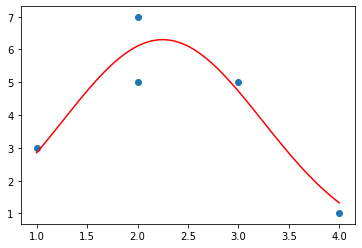

In [113]:
xi = np.array([1,2,2,3,4], dtype=float)
yi = np.array([3,5,7,5,1],dtype=float)
x_range=np.linspace(1,4,100)
plt.scatter(xi,yi)
plt.plot(x_range,c1*np.exp(-c2*(x_range-c3)**2),'r-')

In [68]:
import numpy as np
A=np.random.rand(3,3)
print(A)
B=A.T.dot(A)
print(B)
C=B+10000000*np.diag(np.diag(B))
print(C)
print(np.linalg.inv(C))

[[0.70973642 0.45874464 0.91716986]
 [0.37510684 0.09749628 0.29249052]
 [0.90534077 0.08161179 0.3597499 ]]
[[1.46407285 0.43604579 1.0863603 ]
 [0.43604579 0.22661265 0.47862333]
 [1.0863603  0.47862333 1.05617125]]
[[1.46407299e+07 4.36045787e-01 1.08636030e+00]
 [4.36045787e-01 2.26612676e+06 4.78623330e-01]
 [1.08636030e+00 4.78623330e-01 1.05617135e+07]]
[[ 6.83026054e-08 -1.31427158e-14 -7.02549190e-15]
 [-1.31427158e-14  4.41281580e-07 -1.99974790e-14]
 [-7.02549190e-15 -1.99974790e-14  9.46816060e-08]]
